# NEAT Algorithm-based Stock Trading Strategy with Multiple Technical Indicators Resonance

In [1]:
from neat_trader.utils import visualize
from neat_trader.algorithm.evaluate import Evaluater

import pandas as pd

from neat_trader.utils.tool import run, test, test_population, test_individual
import neat

c:\Users\USER\.conda\envs\neat\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train the model


 ****** Running generation 1994 ****** 

Population's average fitness: -0.70236 stdev: 0.78957
Best fitness: 0.80627 - size: (45, 42) - species 58 - id 243876
Average adjusted fitness: 0.598
Mean genetic distance 3.088, standard deviation 0.733
Population of 256 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    58  330    65     -0.5    0.552    16
    59  269    69     -0.5    0.693    16
    60  113    62     -0.5    0.588    18
    61   57    60     -0.5    0.558    19
Total extinctions: 0
Generation time: 15.524 sec
Saving checkpoint to checkpoint/1209_2337/neat-checkpoint-1994

 ****** Running generation 1995 ****** 

Population's average fitness: -0.32255 stdev: 0.69519
Best fitness: 0.80627 - size: (45, 42) - species 58 - id 243876
Average adjusted fitness: 0.699
Mean genetic distance 3.117, standard deviation 0.726
Population of 256 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ===

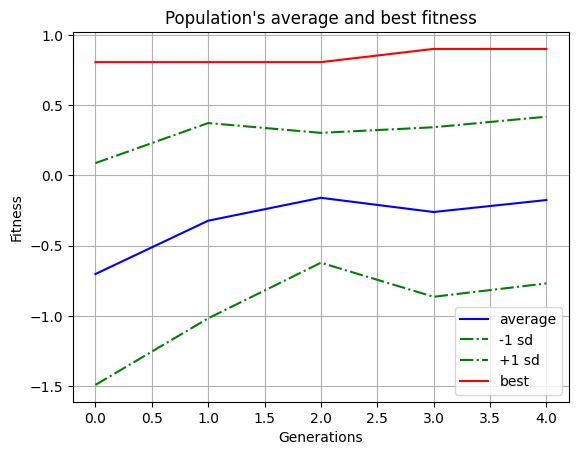

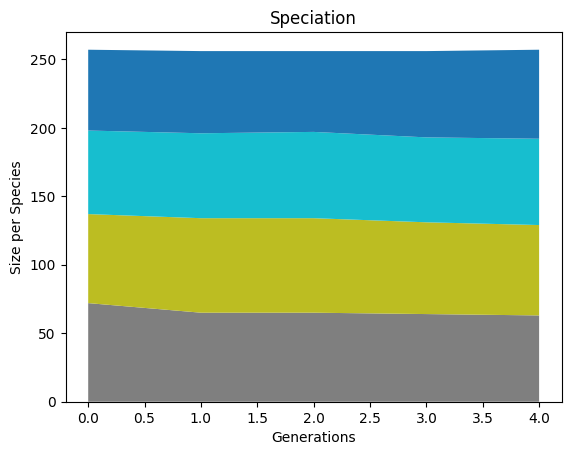

In [4]:
eval = Evaluater(None)
run('config-feedforward', eval, max_generation=5, num_date=365, checkpoint_path=r'checkpoint\1213_0533\neat-checkpoint-1994' )

In [5]:
performances = test_population('VERY_GOOD', 1979, 20, 365)

NameError: name 'evaluate' is not defined

In [ ]:
def compute_SQN(performance):
    #print(performance)
    
    trades = pd.DataFrame()
    for i in performance._trades:
        #print(pd.DataFrame(i))
        #print(trades)
        trades = pd.concat([trades, i ], axis=0, ignore_index=True)
    return trades['PnL'].mean()/trades['PnL'].std()

In [ ]:
import numpy as np
df = pd.DataFrame(index=performances['individual_index'].unique(), columns=['relative_return', 'relative_win_rate', 'total_SQN', '# trades', 'exposure'])

for ind in performances['individual_index'].unique():
    temp = performances[performances['individual_index']==ind].copy()
    temp['relative_return'] = temp['Return [%]']-temp['Buy & Hold Return [%]']
    df.loc[ind,'relative_return'] = temp['relative_return'].mean()
    win = temp['relative_return']>0
    df.loc[ind,'relative_win_rate'] = sum(win)/len(win)
    df.loc[ind,'total_SQN'] = compute_SQN(temp)
    df.loc[ind,'exposure'] = temp['Exposure Time [%]'].mean()
    df.loc[ind,'# trades'] = temp['# Trades'].sum()
    df.loc[ind,'return'] = temp['Return [%]'].mean()
    try:
        df.loc[ind, 'avg_duration'] = ((temp['Avg. Trade Duration']/ np.timedelta64(1, 'D')).astype(int)).mean()
    except:
        pass 

In [ ]:
df['total_SQN']

23203   -0.076856
23205    0.295451
23436    0.153648
23437     0.21608
23438    0.191287
           ...   
23676    0.107456
23677    0.545485
23678    0.069906
23679    0.020523
23680    0.160872
Name: total_SQN, Length: 257, dtype: object

In [ ]:
df.sort_values('relative_return')

,relative_return,relative_win_rate,total_SQN,# trades,exposure,avg_duration
23468,-42.540587,0.25,-0.353351,71,85.290529,247.25
23505,-42.436369,0.25,-0.425281,55,85.272214,257.50
23502,-42.377677,0.25,-0.523287,35,85.272214,292.60
23480,-41.140855,0.25,-0.33368,69,85.308845,254.30
23464,-39.872206,0.3,-0.541329,32,83.32084,309.40
...,...,...,...,...,...,...
23465,3.573621,0.55,0.687206,21,84.721345,325.00
23626,3.641083,0.6,0.630371,22,84.980311,327.25
23554,3.657606,0.5,0.236561,278,87.052219,56.80
23550,3.672444,0.55,0.703455,20,85.253699,335.05


In [ ]:
tmp = performances[performances['individual_index']==23448]

In [ ]:
tmp[['Return [%]','Buy & Hold Return [%]']]

,Return [%],Buy & Hold Return [%]
280,1.080485,43.954876
281,-0.857523,7.821858
282,6.847148,56.357616
283,-6.764766,30.987358
284,34.518166,61.844952
285,3.840582,25.290468
286,3.238345,33.671355
287,-35.992425,-48.684672
288,3.348982,0.206830
289,24.868184,18.422114


In [ ]:
tmp.bt[699].plot()

Row(id='4134', ...)

In [ ]:
import plotly.express as px
df['relative_return'] = pd.Series(df['relative_return'], dtype=float)
px.scatter(df,x='avg_duration'  , y='total_SQN', color='return', color_continuous_midpoint=0, color_continuous_scale=['green','rgb(200,200,200)','red'], hover_data=[df.index,'# trades'])

In [ ]:
df = df[df['avg_duration']<365/2]
df = df[df['# trades']>5*20]
df['index'] = df.index

In [ ]:
import plotly.express as px
df['relative_return'] = pd.Series(df['relative_return'], dtype=float)
fig = px.scatter(df,x='avg_duration', y='total_SQN', color='return', color_continuous_midpoint=0, color_continuous_scale=['green','white','red'], hover_data=[df.index,'# trades'])
fig.show()
fig.write_html("checkpoint\VERY_GOOD\graph/population.html")

In [ ]:
performance, bts = test_individual('VERY_GOOD',1979, 23554, 100,365)

In [ ]:
performance

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy,_equity_curve,_trades,relative return
0,2003-03-28,2004-04-26,395 days,86.764706,1195155.277493,1222837.793545,19.515528,7.913872,17.959078,15.109989,...,0.700351,69 days,18 days,2.642268,0.735951,2.54343,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,11.601656
1,2008-10-13,2009-11-10,393 days,86.813187,1953946.352333,2005481.640471,95.394635,101.954024,85.581526,65.852091,...,13.974023,232 days,77 days,28.709166,14.959682,1.645202,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,-6.559389
0,2013-10-17,2014-11-14,393 days,87.179487,1326063.425029,1340362.752579,32.606343,0.048506,29.758637,33.52764,...,4.437112,211 days,39 days,104.897798,4.608363,1.914959,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,32.557836
0,2016-10-26,2017-11-24,394 days,87.179487,1222055.120147,1345139.699847,22.205512,16.010606,20.334873,26.975165,...,8.909237,190 days,117 days,8.154881,9.512964,1.047427,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,6.194906
0,2003-03-17,2004-04-14,394 days,86.813187,938598.331419,1073253.322766,-6.140167,29.202707,-5.681536,10.436654,...,0.889137,82 days,22 days,2.106235,0.942337,-0.481742,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,-35.342874
0,2017-02-22,2018-03-23,394 days,87.226277,1005739.31733,1131972.495449,0.573932,20.588695,0.527728,16.067596,...,-0.62838,82 days,31 days,0.771578,-0.504678,0.274766,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-20.014763
0,2011-10-17,2012-11-14,394 days,87.132353,960223.440918,1185219.125668,-3.977656,9.549073,-3.690649,19.503722,...,1.146995,98 days,36 days,1.825318,1.328361,-0.061636,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-13.526728
0,2018-08-06,2019-09-04,394 days,86.764706,1026414.181875,1028106.529926,2.641418,14.345954,2.444842,24.871653,...,1.188495,114 days,35 days,1.731791,1.571034,0.128841,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-11.704536
0,2004-02-23,2005-03-24,395 days,87.272727,1069950.029641,1077224.572195,6.995003,-0.179376,6.391673,9.624062,...,0.783201,73 days,22 days,2.791237,0.81427,1.217191,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,7.174379
0,2013-02-28,2014-03-28,393 days,87.179487,1297462.970793,1307300.506514,29.746297,60.463486,27.17313,25.75008,...,6.417387,113 days,54 days,6.800175,6.817144,2.100069,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-30.717189


In [ ]:
performance = performance.reset_index(drop=True)
performance.index.name= 'index'

In [ ]:
trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,33537,36,82,29.138160,25.889999,-108933.559826,-0.111474,2018-11-01,2019-01-10,70 days
1,400,36,127,29.138160,33.340000,1680.736092,0.144204,2018-11-01,2019-03-18,137 days
2,33351,83,127,25.621140,33.340000,257431.715147,0.301269,2019-01-11,2019-03-18,66 days
3,368,83,156,25.621140,34.430000,3241.660705,0.343812,2019-01-11,2019-04-29,108 days
4,33201,128,156,33.516901,34.430000,30315.817851,0.027243,2019-03-19,2019-04-29,41 days
...,...,...,...,...,...,...,...,...,...,...
16,43078,257,266,20.871660,22.410000,66268.607240,0.073705,2015-10-13,2015-10-26,13 days
17,-2508,266,268,22.365180,22.600000,-588.929899,-0.010499,2015-10-26,2015-10-28,2 days
18,42922,268,269,22.645200,22.629999,-652.466828,-0.000671,2015-10-28,2015-10-29,1 days
19,-2154,269,270,22.584739,22.770000,-399.052830,-0.008203,2015-10-29,2015-10-30,1 days


In [ ]:
pd.Series(trades['Duration'],dtype=int)

0     70 days
1    137 days
2     66 days
3    108 days
4     41 days
       ...   
16    13 days
17     2 days
18     1 days
19     1 days
20     4 days
Name: Duration, Length: 1402, dtype: timedelta64[ns]

In [ ]:
trades['abs_size'] = abs(trades['Size'])
trades['Duration'] =(trades['Duration']  / np.timedelta64(1, 'D')).astype(int)


UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('int32') and dtype('<m8[ns]')

In [ ]:
trades['long'] = trades['Size']>0

In [ ]:
(trades['PnL']>0).value_counts()


True     989
False    413
Name: PnL, dtype: int64

In [ ]:
bts[69].plot()

Row(id='44928', ...)

In [ ]:
trades = pd.DataFrame()
for trade in performance._trades:
    trades = pd.concat([trades, trade])

In [ ]:
pd.DataFrame(performance[performance['Return [%]']>performance['Buy & Hold Return [%]']])

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy,_equity_curve,_trades,relative return
index,,,,,,,,,,,,,,,,,,,,,
0,2018-09-12,2019-10-11,394 days,86.813187,1136746.757184,1260602.760787,13.674676,2.3227,12.559434,28.453604,...,6.283217,162 days,89 days,4.368839,7.259651,0.457815,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,11.351975
4,2015-11-09,2016-12-06,393 days,86.764706,1140405.790494,1249418.889026,14.040579,-1.30322,12.944183,39.750003,...,3.869031,266 days,78 days,2.723493,4.508158,0.588442,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,15.343799
8,2014-08-18,2015-09-16,394 days,87.179487,1100920.184886,1207180.721939,10.092018,8.197816,9.280795,19.6103,...,2.489551,182 days,64 days,3.908538,2.577859,0.829654,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,1.894202
11,2002-08-07,2003-09-05,394 days,87.179487,1680835.865868,1760579.41136,68.083587,63.663943,61.50174,47.027932,...,3.454734,84 days,21 days,5.296606,3.627566,2.463924,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,4.419643
15,2006-10-30,2007-11-27,393 days,87.084871,1122372.835278,1241479.855799,12.237284,5.787883,11.332509,24.870483,...,1.280314,129 days,52 days,1.716026,1.546078,0.564794,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,6.449401
16,2015-12-02,2016-12-30,394 days,87.179487,1162088.766701,1174481.646658,16.208877,-1.290491,14.873776,19.88491,...,2.367907,109 days,46 days,6.519052,2.438373,1.6979,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,17.499368
21,2015-08-24,2016-09-22,395 days,86.861314,958411.048403,1005602.290523,-4.158895,-4.933116,-3.831453,35.42247,...,-0.352902,140 days,32 days,1.199481,0.775837,-0.086784,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,0.774221
26,2020-04-28,2021-05-28,395 days,87.272727,1705287.833795,1778164.075932,70.528783,65.372933,63.083858,53.599053,...,23.452511,213 days,125 days,NaN,24.654108,1.595205,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,5.155851
29,2016-09-06,2017-10-06,395 days,87.272727,1695691.775261,1696012.885117,69.569178,67.286391,62.242702,44.887106,...,17.673718,220 days,102 days,855.330037,18.947217,1.987096,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,2.282786


In [ ]:
(performance['Return [%]']>performance['Buy & Hold Return [%]']).value_counts()

False    62
True     38
dtype: int64

In [ ]:
performance['Exposure Time [%]'].mean()

86.98942483485945

In [ ]:
px.scatter(trades, x='Duration',y='ReturnPct',size='abs_size', color='long',trendline='ols')

In [ ]:
fig = px.scatter(performance,x='Buy & Hold Return [%]',y= 'Return [%]',range_color=[-50,50],color_continuous_scale=["red", "white", "green"], trendline="ols",hover_data=[performance.index],title='Relative Return')

fig.show()
fig.write_html('checkpoint\VERY_GOOD\graph/relative_return.html')

In [ ]:
trades['long'] = trades['Size']>0

In [ ]:
trades['long'].value_counts()

False    1328
True     1320
Name: long, dtype: int64

In [ ]:
trades[trades['long']]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration,long
0,34228,35,82,28.577040,40.119999,395092.382621,0.403924,2016-04-06,2016-06-13,68 days,True
1,661,35,83,28.577040,39.470001,7200.247064,0.381179,2016-04-06,2016-06-14,69 days,True
4,32080,86,112,41.142121,38.610001,-81230.434163,-0.061546,2016-06-17,2016-07-26,39 days,True
8,33428,118,171,37.464779,47.520000,336125.929906,0.268391,2016-08-03,2016-10-18,76 days,True
12,32193,174,178,47.655121,47.110001,-17549.072810,-0.011439,2016-10-21,2016-10-27,6 days,True
...,...,...,...,...,...,...,...,...,...,...,...
5,22100,105,110,52.274338,50.230000,-45179.883569,-0.039108,2013-04-12,2013-04-19,7 days,True
6,2,105,111,52.274338,50.230000,-4.088677,-0.039108,2013-04-12,2013-04-22,10 days,True
9,20610,114,143,51.613018,54.480000,59088.483028,0.055548,2013-04-25,2013-06-06,42 days,True
11,20327,144,156,55.300379,55.389999,1821.721304,0.001621,2013-06-07,2013-06-25,18 days,True


In [ ]:
trades[trades['long']].ReturnPct.mean()

0.006779453316672259

In [ ]:
trades[~trades['long']].ReturnPct.mean()

-0.007992831014271229

In [ ]:
performance['# Trades'].sum()

2648

In [ ]:
compute_SQN(performance.transpose())*np.sqrt(performance['# Trades'].sum())

NameError: name 'compute_SQN' is not defined

In [ ]:
bts[63].plot()

Row(id='8539', ...)

In [ ]:
(performance['relative return']>=0).value_counts()

False    73
True     27
Name: relative return, dtype: int64

In [ ]:
performance['Return [%]'].std()

38.86051073152876

In [ ]:
performance['Buy & Hold Return [%]'].std()

47.43390473719227

In [ ]:
performance['Return [%]'].mean()

19.761139856931546

In [ ]:
performance['Buy & Hold Return [%]'].mean()

27.97100305549083

In [ ]:
(performance['Buy & Hold Return [%]']>0).value_counts()

True     73
False    27
Name: Buy & Hold Return [%], dtype: int64

In [ ]:
(performance['Return [%]']>0).value_counts()

True     72
False    28
Name: Return [%], dtype: int64

In [ ]:
performance['Exposure Time [%]']

index
0     87.179487
1     87.037037
2     87.132353
3     87.226277
4     87.272727
        ...    
95    86.666667
96    87.272727
97    87.179487
98    86.861314
99    87.132353
Name: Exposure Time [%], Length: 100, dtype: object

In [ ]:
df.index

NameError: name 'df' is not defined

In [ ]:
performance['Return [%]'] = pd.Series(performance['Return [%]'],dtype=float)

In [ ]:
import plotly.express as px
fig = px.scatter(performance,x='Buy & Hold Return [%]',y= 'Return [%]', marginal_x='histogram', marginal_y='histogram',range_color=[-50,50],color_continuous_scale=["red", "white", "green"], trendline="ols",hover_data=[performance.index])

fig.show()
fig.write_html(r'checkpoint\VERY_GOOD\graph\relative_return.html')

In [ ]:
import plotly.express as px
fig = px.scatter(performance,x='# Trades',y= 'Return [%]',color='relative return',range_color=[-50,50],color_continuous_scale=["red", "white", "green"], trendline="ols")

fig.show()


In [ ]:
fig = px.scatter(performance,x='# Trades',y= 'SQN',trendline="ols")
fig.show()

In [ ]:
fig

In [ ]:
performance

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy,_equity_curve,_trades,relative return
index,,,,,,,,,,,,,,,,,,,,,
0,2016-02-16,2017-03-15,393 days,87.179487,1796632.146286,2012360.850244,79.663215,229.623192,71.745507,62.785588,...,3.914745,112 days,21 days,4.009737,4.695485,1.270767,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-149.959977
1,2001-07-11,2002-08-09,394 days,87.037037,736731.190339,1072396.296772,-26.326881,-0.818028,-24.81086,14.552304,...,-1.60754,55 days,13 days,0.531428,-1.445683,-1.537871,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,-25.508853
2,2000-02-10,2001-03-09,393 days,87.132353,902969.283547,1170803.242875,-9.703072,-28.558694,-9.022852,41.220568,...,-1.517561,82 days,13 days,0.732308,-1.092815,-0.300674,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,18.855623
3,2007-09-26,2008-10-24,394 days,87.226277,499251.123349,1010399.415611,-50.074888,-57.121405,-47.211222,16.089311,...,-1.532602,78 days,13 days,0.737324,-1.068221,-2.099786,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,7.046517
4,2019-08-06,2020-09-04,395 days,87.272727,1740764.914308,1824688.826695,74.076491,47.492447,66.190233,57.704971,...,5.725099,84 days,23 days,4.954235,7.222115,1.293865,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,26.584045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-11-28,2012-12-24,392 days,86.666667,980761.367283,1038136.390491,-1.923863,-0.039632,-1.796765,18.972592,...,-0.925171,57 days,11 days,0.436546,-0.876392,-0.144212,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,-1.884231
96,2016-04-26,2017-05-26,395 days,87.272727,1027454.828855,1129930.891918,2.745483,44.782731,2.513,20.831748,...,-0.936058,71 days,18 days,0.710051,-0.781256,0.125961,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,-42.037248
97,2013-11-13,2014-12-12,394 days,87.179487,910142.097945,1031717.368801,-8.985790,13.583132,-8.324213,16.297239,...,-1.206362,120 days,15 days,0.543401,-1.024508,-0.419419,NEAT_strategy,Equity DrawdownPct Drawdo...,Size EntryBar ExitBar EntryPrice Exit...,-22.568922


In [ ]:
node_names = {
        -1: 'long_position', 
        -2: 'short_position',
        -3: 'sma5',
        -4: 'sma10',
        -5: 'slowk',
        -6: 'slowd',
        -7: 'macdhist_diff',
        -8: 'cci',
        -9: 'willr',
        -10: 'rsi',
        -11: 'adosc',
    
        0: 'buy',
        1: 'sell',
        
        2: 'volume'
        }

In [ ]:
visualize.draw_net(config, individual, True
        , node_names=node_names
        )

NameError: name 'config' is not defined

In [ ]:
backtesting_data = eval.generate_random_data(is_test=False, num_date=360)
net = neat.nn.FeedForwardNetwork.create(individual, config)
perfor, bt = backtest(net, backtesting_data)
print(perfor)

Start                     2014-03-19 00:00:00
End                       2015-04-13 00:00:00
Duration                    390 days 00:00:00
Exposure Time [%]                   86.988848
Equity Final [$]               1133597.472228
Equity Peak [$]                1133597.472228
Return [%]                          13.359747
Buy & Hold Return [%]                11.75098
Return (Ann.) [%]                   12.464959
Volatility (Ann.) [%]               15.942192
Sharpe Ratio                         0.781885
Sortino Ratio                        1.765513
Calmar Ratio                         1.289098
Max. Drawdown [%]                   -9.669522
Avg. Drawdown [%]                   -2.703689
Max. Drawdown Duration       98 days 00:00:00
Avg. Drawdown Duration       37 days 00:00:00
# Trades                                   37
Win Rate [%]                        56.756757
Best Trade [%]                       9.834014
Worst Trade [%]                     -6.654867
Avg. Trade [%]                    

In [ ]:
bt.plot(plot_width=1500)

Row(id='26003', ...)

In [ ]:
 visualize.draw_net(config, winner, True
        , node_names=node_names
        )
        print(performance)
        bt.plot(plot_width=1500, filename=file_name+'/Performance_{}.html'.format(backtesting_data['Ticker'][0]))

In [ ]:
performances = pd.DataFrame(performances)

In [ ]:
pd.DataFrame(performances.iloc[:,0])

,240935
0,Start 2003-11-17 00:00:00 ...
1,Start 2010-05-18 00:00:00 ...
2,Start 2014-10-23 00:00:00 ...
3,Start 2020-12-31 00:00:00 ...
4,Start 2019-06-03 00:00:00 ...


In [ ]:
with open(file_name+'winner.pkl', 'rb') as f:
        winner = pickle.load(f)

In [ ]:
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         'config-feedforward')

In [ ]:
evaluate().fitness_fn(performance)

-2.3821055662809294

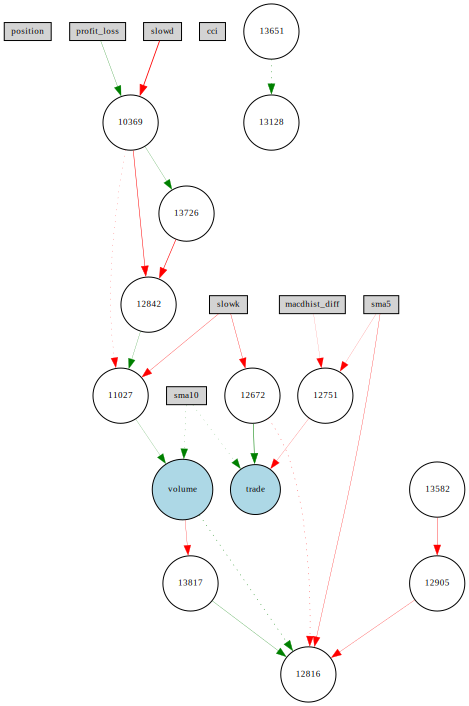

In [ ]:
node_names = {
        -1: 'long_position', 
        -2: 'short_position',
        -3: 'sma5',
        -4: 'sma10',
        -5: 'slowk',
        -6: 'slowd',
        -7: 'macdhist_diff',
        -8: 'cci',
    
        0: 'buy',
        1: 'sell',
        2: 'hold',
        3: 'volume'
        }
visualize.draw_net(config, p.population[27758], True
        , node_names=node_names
        )

In [ ]:
performance, bt = backtest(net, evaluate().generate_random_data(is_test=True))

In [ ]:
bt.plot(plot_width=1500)

Row(id='6720', ...)

In [ ]:
from tqdm import tqdm
performances = []
for _ in tqdm(range(5)) :
    performance = test(r'checkpoint\1209_0416\winner/', plot=True)
    performances.append(performance)

  0%|          | 0/5 [00:00<?, ?it/s]

Start                     2001-10-30 00:00:00
End                       2022-11-25 00:00:00
Duration                   7696 days 00:00:00
Exposure Time [%]                   99.321523
Equity Final [$]                 212554.52003
Equity Peak [$]                 228025.222575
Return [%]                          2025.5452
Buy & Hold Return [%]             2412.762671
Return (Ann.) [%]                   15.623493
Volatility (Ann.) [%]               36.573657
Sharpe Ratio                         0.427179
Sortino Ratio                        0.719818
Calmar Ratio                         0.232676
Max. Drawdown [%]                  -67.147096
Avg. Drawdown [%]                   -4.832678
Max. Drawdown Duration     2153 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                    2030.036541
Worst Trade [%]                   2030.036541
Avg. Trade [%]                    

 20%|██        | 1/5 [00:04<00:17,  4.41s/it]

Start                     2001-12-13 00:00:00
End                       2022-11-25 00:00:00
Duration                   7652 days 00:00:00
Exposure Time [%]                   99.146919
Equity Final [$]                 35139.483898
Equity Peak [$]                  41215.142002
Return [%]                         251.394839
Buy & Hold Return [%]              267.815698
Return (Ann.) [%]                    6.187652
Volatility (Ann.) [%]               48.827406
Sharpe Ratio                         0.126725
Sortino Ratio                        0.208007
Calmar Ratio                         0.069493
Max. Drawdown [%]                  -89.039469
Avg. Drawdown [%]                   -4.303552
Max. Drawdown Duration     3487 days 00:00:00
Avg. Drawdown Duration       77 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                     252.136449
Worst Trade [%]                    251.559185
Avg. Trade [%]                    

 40%|████      | 2/5 [00:08<00:13,  4.34s/it]

Start                     1999-12-31 00:00:00
End                       2022-11-25 00:00:00
Duration                   8365 days 00:00:00
Exposure Time [%]                   99.392783
Equity Final [$]                125849.268963
Equity Peak [$]                 148377.042538
Return [%]                         1158.49269
Buy & Hold Return [%]             1089.615406
Return (Ann.) [%]                   11.708206
Volatility (Ann.) [%]               41.410188
Sharpe Ratio                         0.282737
Sortino Ratio                        0.465094
Calmar Ratio                         0.146041
Max. Drawdown [%]                  -80.170821
Avg. Drawdown [%]                   -4.688116
Max. Drawdown Duration     1397 days 00:00:00
Avg. Drawdown Duration       54 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                    1158.998541
Worst Trade [%]                   1096.205479
Avg. Trade [%]                    

 60%|██████    | 3/5 [00:13<00:08,  4.38s/it]

Start                     1999-12-31 00:00:00
End                       2022-11-25 00:00:00
Duration                   8365 days 00:00:00
Exposure Time [%]                   99.392783
Equity Final [$]                227052.111026
Equity Peak [$]                  228448.40311
Return [%]                         2170.52111
Buy & Hold Return [%]             1935.596547
Return (Ann.) [%]                   14.627632
Volatility (Ann.) [%]               39.414557
Sharpe Ratio                         0.371123
Sortino Ratio                         0.63749
Calmar Ratio                         0.198331
Max. Drawdown [%]                   -73.75375
Avg. Drawdown [%]                   -5.562828
Max. Drawdown Duration     2060 days 00:00:00
Avg. Drawdown Duration       63 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                    2173.987914
Worst Trade [%]                   2173.987914
Avg. Trade [%]                    

 80%|████████  | 4/5 [00:17<00:04,  4.38s/it]

Start                     1999-12-31 00:00:00
End                       2022-11-25 00:00:00
Duration                   8365 days 00:00:00
Exposure Time [%]                   99.392783
Equity Final [$]                 42192.194935
Equity Peak [$]                  56873.182484
Return [%]                         321.921949
Buy & Hold Return [%]              276.741559
Return (Ann.) [%]                    6.496399
Volatility (Ann.) [%]                40.57524
Sharpe Ratio                         0.160107
Sortino Ratio                        0.262292
Calmar Ratio                         0.084284
Max. Drawdown [%]                  -77.077792
Avg. Drawdown [%]                   -6.151154
Max. Drawdown Duration     2151 days 00:00:00
Avg. Drawdown Duration       86 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     323.027778
Worst Trade [%]                    323.027778
Avg. Trade [%]                    

100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


In [ ]:
performances=pd.DataFrame(performances)
performances

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy,_equity_curve,_trades
0,2001-10-30,2022-11-25,7696 days,99.321523,212554.520030,228025.222575,2025.545200,2412.762671,15.623493,36.573657,...,2030.036541,2030.036541,7645 days,7645 days,NaN,2030.036541,NaN,NEAT_strategy,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...
1,2001-12-13,2022-11-25,7652 days,99.146919,35139.483898,41215.142002,251.394839,267.815698,6.187652,48.827406,...,251.559185,251.847698,7583 days,7583 days,NaN,251.847817,1.006158,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...
2,1999-12-31,2022-11-25,8365 days,99.392783,125849.268963,148377.042538,1158.492690,1089.615406,11.708206,41.410188,...,1096.205479,1127.200453,8312 days,8279 days,NaN,1127.602010,1.002085,NEAT_strategy,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitPr...
3,1999-12-31,2022-11-25,8365 days,99.392783,227052.111026,228448.403110,2170.521110,1935.596547,14.627632,39.414557,...,2173.987914,2173.987914,8312 days,8312 days,NaN,2173.987914,NaN,NEAT_strategy,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...
4,1999-12-31,2022-11-25,8365 days,99.392783,42192.194935,56873.182484,321.921949,276.741559,6.496399,40.575240,...,323.027778,323.027778,8312 days,8312 days,NaN,323.027778,NaN,NEAT_strategy,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...


In [ ]:
performances.columns

Index(['Start', 'End', 'Duration', 'Exposure Time [%]', 'Equity Final [$]',
       'Equity Peak [$]', 'Return [%]', 'Buy & Hold Return [%]',
       'Return (Ann.) [%]', 'Volatility (Ann.) [%]', 'Sharpe Ratio',
       'Sortino Ratio', 'Calmar Ratio', 'Max. Drawdown [%]',
       'Avg. Drawdown [%]', 'Max. Drawdown Duration', 'Avg. Drawdown Duration',
       '# Trades', 'Win Rate [%]', 'Best Trade [%]', 'Worst Trade [%]',
       'Avg. Trade [%]', 'Max. Trade Duration', 'Avg. Trade Duration',
       'Profit Factor', 'Expectancy [%]', 'SQN', '_strategy', '_equity_curve',
       '_trades'],
      dtype='object')

<AxesSubplot:>

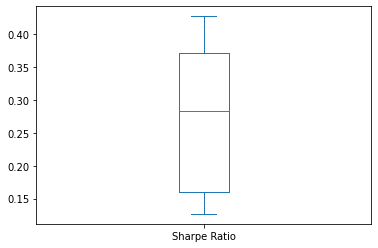

In [ ]:
performances[['Sharpe Ratio']].plot.box()

<AxesSubplot:>

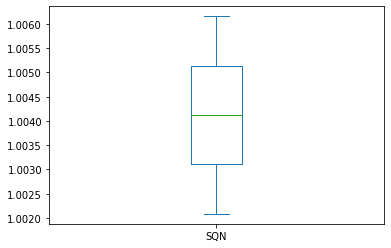

In [ ]:
performances[['SQN']].plot.box()

<AxesSubplot:>

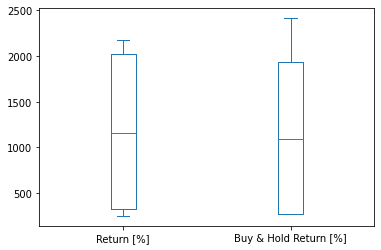

In [ ]:
performances[['Return [%]','Buy & Hold Return [%]']].plot.box()


<AxesSubplot:>

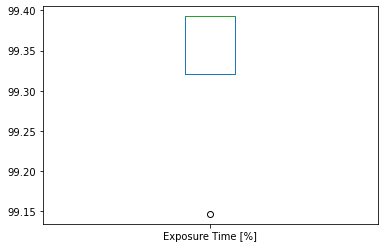

In [ ]:
performances[['Exposure Time [%]']].plot.box()

<AxesSubplot:>

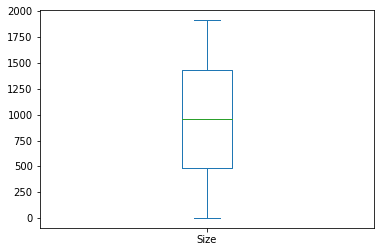

In [ ]:
performances['_trades'][2]['Size'].plot.box()

In [ ]:
performances['Buy & Hold Return [%]'].mean()

1196.506376203024

In [ ]:
test('checkpoint/1129_0032\winner/')

RuntimeError: Expected 4 inputs, got 8